In [1]:
# Import required libraries
import sys
from pathlib import Path

import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Add project root to path to enable imports from src directory
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

from src.config import config

# Configure plotting
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## 1. Load Weather Data

In [2]:
# Load all weather parquet files
weather_files = list(config.weather_raw_path.glob("weather_*.parquet"))
print(f"Found {len(weather_files)} weather files")

# Load data
df_weather = pl.concat([
    pl.read_parquet(f) for f in weather_files
])

print(f"\nDataFrame shape: {df_weather.shape}")
print(f"\nDataFrame schema:")
print(df_weather.schema)

Found 731 weather files

DataFrame shape: (175210, 8)

DataFrame schema:
Schema([('timestamp', Datetime(time_unit='us', time_zone=None)), ('asset_id', String), ('wind_speed_mps', Float64), ('wind_direction_deg', Float64), ('ghi', Float64), ('temperature_c', Float64), ('pressure_hpa', Float64), ('relative_humidity', Float64)])

DataFrame shape: (175210, 8)

DataFrame schema:
Schema([('timestamp', Datetime(time_unit='us', time_zone=None)), ('asset_id', String), ('wind_speed_mps', Float64), ('wind_direction_deg', Float64), ('ghi', Float64), ('temperature_c', Float64), ('pressure_hpa', Float64), ('relative_humidity', Float64)])


In [3]:
# Display sample data
df_weather.head(10)

timestamp,asset_id,wind_speed_mps,wind_direction_deg,ghi,temperature_c,pressure_hpa,relative_humidity
datetime[μs],str,f64,f64,f64,f64,f64,f64
2024-10-30 00:00:00,"""ASSET_001""",7.601395,152.777753,0.0,3.561026,1012.68258,73.936294
2024-10-30 00:00:00,"""ASSET_002""",6.024677,172.640189,0.0,2.996798,1014.796954,59.040935
2024-10-30 00:00:00,"""ASSET_003""",5.868709,93.331759,0.0,-0.871228,1016.524574,88.433116
2024-10-30 00:00:00,"""ASSET_004""",3.658789,50.192664,0.0,3.31579,1009.108541,79.121244
2024-10-30 00:00:00,"""ASSET_005""",8.716884,241.706881,0.0,2.625358,999.391075,86.392723
2024-10-30 00:00:00,"""ASSET_006""",2.519512,125.977777,0.0,-0.085282,1008.589888,55.310091
2024-10-30 00:00:00,"""ASSET_007""",4.157229,138.451858,0.0,3.586098,1004.53217,69.448199
2024-10-30 00:00:00,"""ASSET_008""",6.648781,257.577826,0.0,4.136665,1010.9515,72.696899
2024-10-30 00:00:00,"""ASSET_009""",9.856285,336.701267,0.0,0.284623,1007.582568,84.689818


## 2. Summary Statistics

In [4]:
# Overall statistics
df_weather.describe()

statistic,timestamp,asset_id,wind_speed_mps,wind_direction_deg,ghi,temperature_c,pressure_hpa,relative_humidity
str,str,str,f64,f64,f64,f64,f64,f64
"""count""","""175210""","""175210""",175210.0,175210.0,175210.0,175210.0,175210.0,175210.0
"""null_count""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""","""2024-01-01 00:00:00""",null,10.002862,152.444393,295.766034,14.997455,1013.0034,61.984874
"""std""",null,null,3.100481,81.957953,334.299982,9.411665,6.127844,12.054098
"""min""","""2023-01-01 00:00:00""","""ASSET_001""",0.0,0.020603,0.0,-7.557916,989.171951,20.0
"""25%""","""2023-07-02 12:00:00""",null,7.790504,93.806927,0.0,7.259083,1008.754288,53.83155
"""50%""","""2024-01-01 00:00:00""",null,10.000524,144.692735,0.0,14.981479,1013.016307,62.111255
"""75%""","""2024-07-01 12:00:00""",null,12.215429,198.962405,629.022537,22.735646,1017.247845,70.221919
"""max""","""2024-12-31 00:00:00""","""ASSET_010""",22.267096,359.993102,997.284083,38.457295,1037.321146,95.0


In [5]:
# Statistics by asset
asset_stats = df_weather.group_by("asset_id").agg([
    pl.len().alias("observations"),
    pl.col("wind_speed_mps").mean().alias("avg_wind_speed"),
    pl.col("ghi").mean().alias("avg_ghi"),
    pl.col("temperature_c").mean().alias("avg_temperature"),
]).sort("asset_id")

asset_stats

asset_id,observations,avg_wind_speed,avg_ghi,avg_temperature
str,u32,f64,f64,f64
"""ASSET_001""",17521,10.009813,295.391709,14.982247
"""ASSET_002""",17521,10.025615,296.030266,14.992126
"""ASSET_003""",17521,9.987304,296.291457,14.986579
"""ASSET_004""",17521,9.976295,295.701276,15.014647
"""ASSET_005""",17521,10.021138,295.444298,15.014755
"""ASSET_006""",17521,9.980824,295.750207,15.009408
"""ASSET_007""",17521,10.028704,295.727285,15.013061
"""ASSET_008""",17521,10.000687,296.034638,14.984094
"""ASSET_009""",17521,10.002634,295.584872,14.997566


## 3. Temporal Patterns

In [6]:
# Extract time features
df_temporal = df_weather.with_columns([
    pl.col("timestamp").dt.hour().alias("hour"),
    pl.col("timestamp").dt.month().alias("month"),
    pl.col("timestamp").dt.date().alias("date"),
])

# Hourly patterns (averaged across all days)
hourly_avg = df_temporal.group_by("hour").agg([
    pl.col("wind_speed_mps").mean().alias("avg_wind_speed"),
    pl.col("ghi").mean().alias("avg_ghi"),
    pl.col("temperature_c").mean().alias("avg_temperature"),
]).sort("hour")

hourly_avg

hour,avg_wind_speed,avg_ghi,avg_temperature
i8,f64,f64,f64
0,8.530483,0.0,9.982324
1,8.551205,0.0,10.175281
2,8.69326,0.0,10.698616
3,8.942559,0.0,11.473025
4,9.244051,0.0,12.496985
…,…,…,…
19,9.605431,0.0,13.684115
20,9.211614,0.0,12.51758
21,8.962632,0.0,11.434701


In [7]:
# Plot hourly patterns
fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=('Wind Speed by Hour', 'Solar Irradiance by Hour', 'Temperature by Hour')
)

fig.add_trace(
    go.Scatter(x=hourly_avg['hour'], y=hourly_avg['avg_wind_speed'], 
               mode='lines+markers', name='Wind Speed'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=hourly_avg['hour'], y=hourly_avg['avg_ghi'], 
               mode='lines+markers', name='GHI', line=dict(color='orange')),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=hourly_avg['hour'], y=hourly_avg['avg_temperature'], 
               mode='lines+markers', name='Temperature', line=dict(color='red')),
    row=3, col=1
)

fig.update_xaxes(title_text="Hour of Day", row=3, col=1)
fig.update_yaxes(title_text="Wind Speed (m/s)", row=1, col=1)
fig.update_yaxes(title_text="GHI (W/m²)", row=2, col=1)
fig.update_yaxes(title_text="Temperature (°C)", row=3, col=1)

fig.update_layout(height=900, title_text="Diurnal Weather Patterns", showlegend=False)
fig.show()

## 4. Distribution Analysis

In [8]:
# Sample one asset for detailed analysis
sample_asset = "ASSET_001"
df_sample = df_weather.filter(pl.col("asset_id") == sample_asset)

print(f"Analyzing {sample_asset}: {len(df_sample)} observations")

Analyzing ASSET_001: 17521 observations


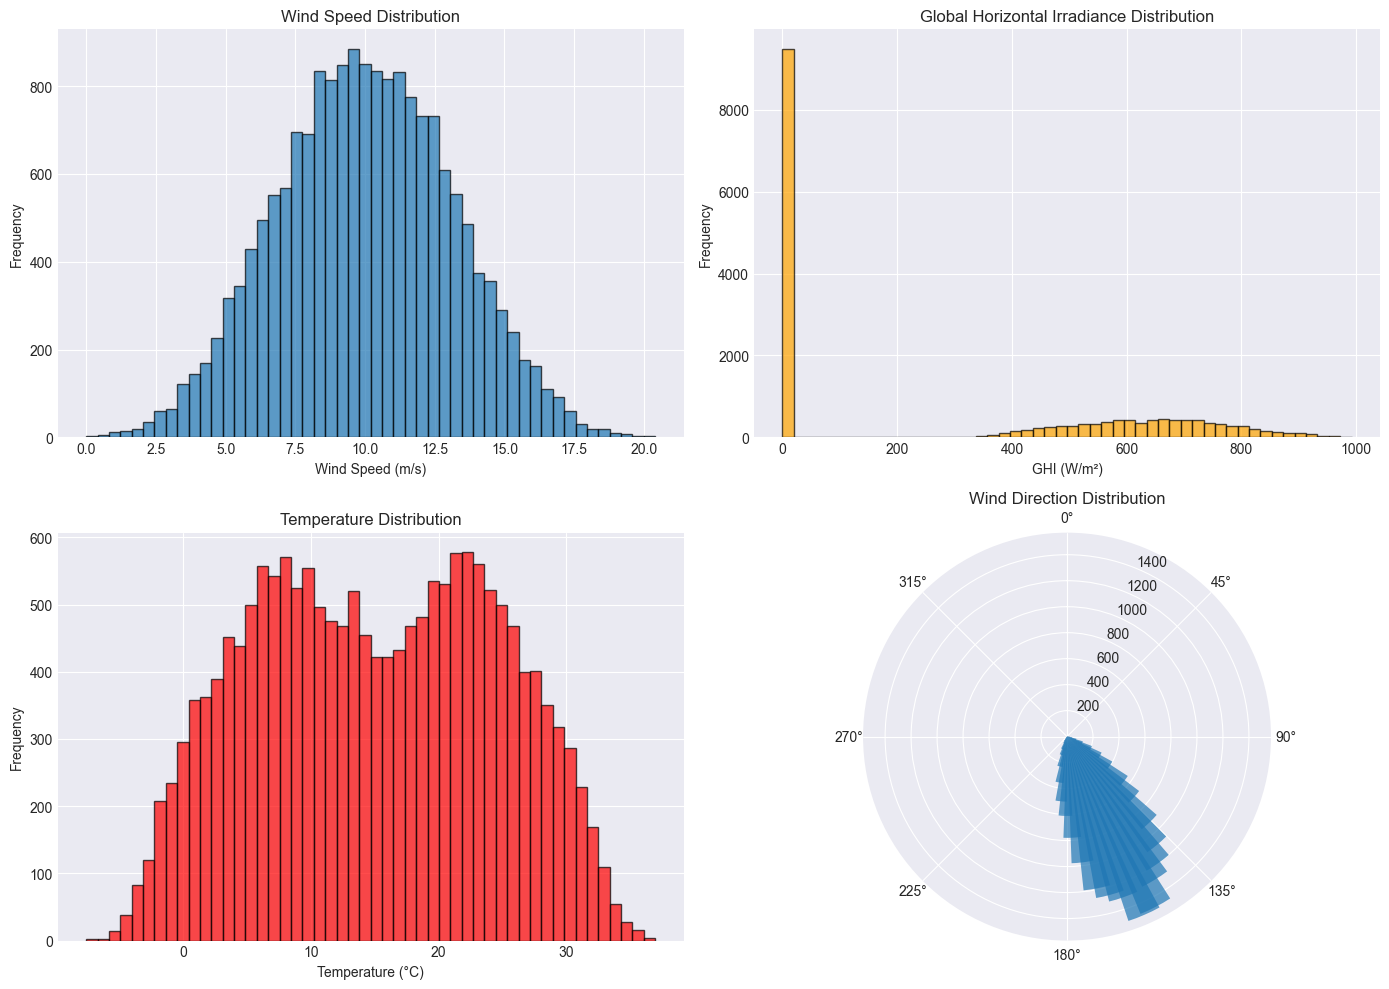

In [9]:
# Create distribution plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Wind speed distribution
axes[0, 0].hist(df_sample['wind_speed_mps'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Wind Speed Distribution')
axes[0, 0].set_xlabel('Wind Speed (m/s)')
axes[0, 0].set_ylabel('Frequency')

# GHI distribution
axes[0, 1].hist(df_sample['ghi'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('Global Horizontal Irradiance Distribution')
axes[0, 1].set_xlabel('GHI (W/m²)')
axes[0, 1].set_ylabel('Frequency')

# Temperature distribution
axes[1, 0].hist(df_sample['temperature_c'], bins=50, edgecolor='black', alpha=0.7, color='red')
axes[1, 0].set_title('Temperature Distribution')
axes[1, 0].set_xlabel('Temperature (°C)')
axes[1, 0].set_ylabel('Frequency')

# Wind direction distribution (polar)
axes[1, 1].remove()
ax_polar = fig.add_subplot(2, 2, 4, projection='polar')
wind_directions = df_sample['wind_direction_deg'].to_numpy()
hist, bins = np.histogram(wind_directions, bins=36)
theta = np.deg2rad(bins[:-1])
ax_polar.bar(theta, hist, width=np.deg2rad(10), alpha=0.7)
ax_polar.set_title('Wind Direction Distribution')
ax_polar.set_theta_zero_location('N')
ax_polar.set_theta_direction(-1)

plt.tight_layout()
plt.show()

## 5. Correlation Analysis

In [10]:
# Correlation matrix for weather variables
correlation_vars = ['wind_speed_mps', 'ghi', 'temperature_c', 'pressure_hpa', 'relative_humidity']

# Compute correlations using Polars
corr_matrix = {}
for var1 in correlation_vars:
    corr_matrix[var1] = {}
    for var2 in correlation_vars:
        corr = df_sample.select(pl.corr(var1, var2)).item()
        corr_matrix[var1][var2] = corr

# Convert to DataFrame for visualization
import pandas as pd
corr_df = pd.DataFrame(corr_matrix)

# Plot correlation heatmap
fig = px.imshow(
    corr_df,
    labels=dict(color="Correlation"),
    x=correlation_vars,
    y=correlation_vars,
    color_continuous_scale='RdBu_r',
    zmin=-1, zmax=1,
    title='Weather Variable Correlations'
)

fig.update_layout(width=700, height=600)
fig.show()

## 6. Time Series Visualization

In [13]:
# Plot one week of data
import datetime as dt

# use Python date objects to compare with the timestamp's date
start_date = dt.date(2023, 7, 1)
end_date = dt.date(2023, 7, 8)

# compare the date part of the timestamp to avoid type mismatch
df_week = df_sample.filter(
    (pl.col("timestamp").dt.date() >= start_date) &
    (pl.col("timestamp").dt.date() < end_date)
)

# --- Data hygiene to avoid plotting jumps ---
# Ensure timestamp is datetime and wind speed is numeric, then sort by timestamp
df_week = (
    df_week
    .with_columns([
        pl.col("timestamp").cast(pl.Datetime).alias("timestamp"),
        pl.col("wind_speed_mps").cast(pl.Float64).alias("wind_speed_mps")
    ])
    .drop_nulls(["timestamp", "wind_speed_mps"]) 
    .sort("timestamp")
)

# Remove implausible outliers (adjust thresholds if needed)
df_week = df_week.filter((pl.col("wind_speed_mps") >= 0) & (pl.col("wind_speed_mps") <= 40))

# Add a smoothed wind speed (rolling mean) to help visualize the trend
# window size is in rows; tune as needed (e.g., 5, 15)
df_week = df_week.with_columns(
    pl.col("wind_speed_mps").rolling_mean(window_size=7).alias("wind_speed_smooth")
)

# Quick debugging output (head + info) to inspect remaining anomalies — you can remove these after verifying
print("df_week shape:", df_week.shape)
print(df_week.select([pl.col("timestamp").head(5), pl.col("wind_speed_mps").head(5), pl.col("wind_speed_smooth").head(5)]))

# Plot
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=("Wind Speed", "Solar Irradiance"),
    shared_xaxes=True
)

# Raw (points + lines) and smoothed line for wind speed
fig.add_trace(
    go.Scatter(
        x=df_week['timestamp'], y=df_week['wind_speed_mps'],
        mode='markers+lines', name='Wind Speed (raw)',
        marker=dict(size=4, opacity=0.6)
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=df_week['timestamp'], y=df_week['wind_speed_smooth'],
        mode='lines', name='Wind Speed (smoothed)',
        line=dict(width=3, color='firebrick')
    ),
    row=1, col=1
)

# Solar irradiance (GHI) as before
fig.add_trace(
    go.Scatter(x=df_week['timestamp'], y=df_week['ghi'], 
               mode='lines', name='GHI', line=dict(color='orange')),
    row=2, col=1
)

fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_yaxes(title_text="Wind Speed (m/s)", row=1, col=1)
fig.update_yaxes(title_text="GHI (W/m²)", row=2, col=1)

fig.update_layout(height=700, title_text=f"One Week Weather Data ({start_date} to {end_date})")
fig.show()

df_week shape: (168, 9)
shape: (5, 3)
┌─────────────────────┬────────────────┬───────────────────┐
│ timestamp           ┆ wind_speed_mps ┆ wind_speed_smooth │
│ ---                 ┆ ---            ┆ ---               │
│ datetime[μs]        ┆ f64            ┆ f64               │
╞═════════════════════╪════════════════╪═══════════════════╡
│ 2023-07-01 00:00:00 ┆ 8.696845       ┆ null              │
│ 2023-07-01 01:00:00 ┆ 5.767709       ┆ null              │
│ 2023-07-01 02:00:00 ┆ 11.617978      ┆ null              │
│ 2023-07-01 03:00:00 ┆ 9.677839       ┆ null              │
│ 2023-07-01 04:00:00 ┆ 9.289084       ┆ null              │
└─────────────────────┴────────────────┴───────────────────┘


## Summary

This notebook demonstrated:
- Loading weather data from Parquet files
- Computing summary statistics by asset and time
- Visualizing diurnal patterns in weather variables
- Analyzing distributions of key weather parameters
- Examining correlations between weather variables
- Time series visualization of weather data

Next steps:
- Analyze generation data (see `eda_generation.ipynb`)
- Correlate weather with generation performance (see `correlation_summary.ipynb`)